In [1]:
#import pakietów
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dane = pd.read_csv("covid.csv", header=0, sep = ",")
dane

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests
0,3/3/20,NaN,NaN,NaN,NaN,108.0,108.0
1,4/3/20,NaN,NaN,NaN,NaN,3.0,111.0
2,5/3/20,NaN,NaN,NaN,NaN,NaN,NaN
3,6/3/20,NaN,NaN,NaN,NaN,9.0,120.0
4,7/3/20,NaN,NaN,NaN,NaN,7.0,127.0
...,...,...,...,...,...,...,...
445,22/5/21,787726.0,1028.0,12348.0,38.0,12230.0,5795004.0
446,23/5/21,789080.0,1354.0,12376.0,28.0,15205.0,5810209.0
447,24/5/21,790521.0,1441.0,12401.0,25.0,17683.0,5827892.0
448,25/5/21,792196.0,1675.0,12441.0,40.0,16624.0,5844516.0


In [31]:
dane = dane.dropna()

In [14]:
names = ['total_cases','new_cases','total_deaths','new_deaths','new_tests','total_tests']

# Statystyki:

In [46]:
print('Średnia:')

for i in names:
    srednia = np.mean(dane[i])
    print(i+":", srednia)

Średnia:
total_cases: 366578.6267281106
new_cases: 1826.9516129032259
total_deaths: 5372.156682027649
new_deaths: 28.702764976958527
new_tests: 13503.615207373272
total_tests: 2381633.301843318


In [47]:
print('Mediana:')

for i in names:
    mediana = statistics.median(dane[i])
    print(i+":", mediana)

Mediana:
total_cases: 393979.0
new_cases: 1567.5
total_deaths: 5735.0
new_deaths: 26.0
new_tests: 13642.0
total_tests: 2216853.0


In [48]:
print('Moda:')

for i in names:
    moda = statistics.mode(dane[i])
    print(i+":", moda)

Moda:
total_cases: 48.0
new_cases: 3.0
total_deaths: 5.0
new_deaths: 37.0
new_tests: 11532.0
total_tests: 427.0


In [49]:
print('Wariancja:')

for i in names:
    wariancja = statistics.variance(dane[i])
    print(i, wariancja)

Wariancja:
total_cases 55986683787.911156
new_cases 1963164.9376070923
total_deaths 13046577.993869796
new_deaths 406.5419322910569
new_tests 39708599.142585754
total_tests 3086757568949.7354


In [50]:
print('Wariancja:')

for i in names:
    std = statistics.stdev(dane[i])
    print(i+":", std)

Wariancja:
total_cases: 236615.0540179368
new_cases: 1401.1298789216837
total_deaths: 3612.0047056821227
new_deaths: 20.162885019040726
new_tests: 6301.475949536406
total_tests: 1756917.0637653149


In [51]:
print('Skośność:')

for i in names:
    skosnosc = scipy.stats.skew(dane[i], bias=False)
    print(i+":", skosnosc)

Skośność:
total_cases: -0.09988348031355537
new_cases: 1.419381678372216
total_deaths: 0.016461917456500188
new_deaths: 1.341197286675677
new_tests: 0.3226714708339095
total_tests: 0.2984972838883711


total_cases:


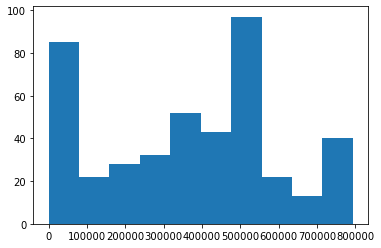

new_cases:


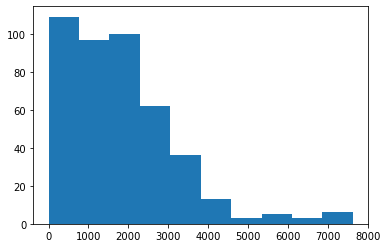

total_deaths:


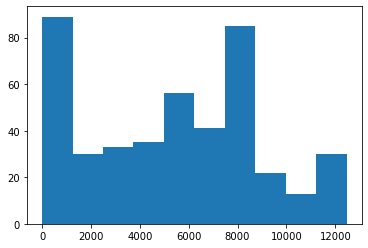

new_deaths:


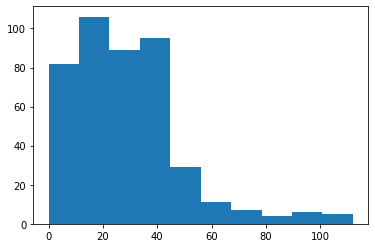

new_tests:


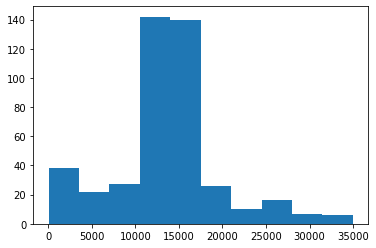

total_tests:


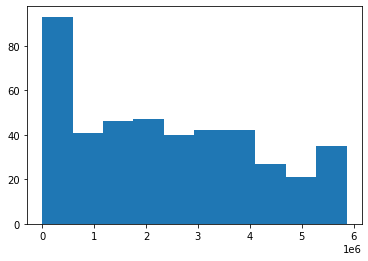

In [52]:
for i in names:
    print(i+":")
    plt.hist(dane[i])
    plt.show()

In [55]:
print('Kwartyle:')

for i in names:
    print(i+":", statistics.quantiles(dane[i], n=4, method='inclusive'))

Kwartyle:
total_cases: [163217.25, 393979.0, 537989.0]
new_cases: [767.75, 1567.5, 2547.25]
total_deaths: [2063.0, 5735.0, 8201.25]
new_deaths: [15.0, 26.0, 38.0]
new_tests: [11267.25, 13642.0, 15725.25]
total_tests: [852586.25, 2216853.0, 3743049.25]


In [56]:
print('Percentyle:')

for i in names:
    q = np.percentile(dane[i], [25, 50, 75])
    print(i+":", q)

Percentyle:
total_cases: [163217.25 393979.   537989.  ]
new_cases: [ 767.75 1567.5  2547.25]
total_deaths: [2063.   5735.   8201.25]
new_deaths: [15. 26. 38.]
new_tests: [11267.25 13642.   15725.25]
total_tests: [ 852586.25 2216853.   3743049.25]


# Analiza korelacji:

In [60]:
for i in ['total_cases','new_cases','total_deaths','new_deaths','new_tests']:
    for j in ['new_cases','total_deaths','new_deaths','new_tests','total_tests']:
        if i != j:
            korelacja = scipy.stats.linregress(dane[i], dane[j])
            print("dla "+i+" i "+j+":", korelacja.rvalue)

dla total_cases i new_cases: 0.17733132308625682
dla total_cases i total_deaths: 0.9978557087151005
dla total_cases i new_deaths: 0.38401144246375357
dla total_cases i new_tests: 0.6824890419289216
dla total_cases i total_tests: 0.9840073239917765
dla new_cases i total_deaths: 0.13707468228225575
dla new_cases i new_deaths: 0.7575489031890664
dla new_cases i new_tests: 0.745800423079231
dla new_cases i total_tests: 0.17628855728985782
dla total_deaths i new_cases: 0.13707468228225575
dla total_deaths i new_deaths: 0.3471265253109743
dla total_deaths i new_tests: 0.6590264931131256
dla total_deaths i total_tests: 0.9897336618300071
dla new_deaths i new_cases: 0.7575489031890664
dla new_deaths i total_deaths: 0.3471265253109743
dla new_deaths i new_tests: 0.6524440045953217
dla new_deaths i total_tests: 0.3633133572110294
dla new_tests i new_cases: 0.745800423079231
dla new_tests i total_deaths: 0.6590264931131256
dla new_tests i new_deaths: 0.6524440045953217
dla new_tests i total_tests

# Wizualizacja korelacji:

Wykres korelacji dla new_tests i total_tests:
Regression line: y=1442.02+0.00x, r=0.18


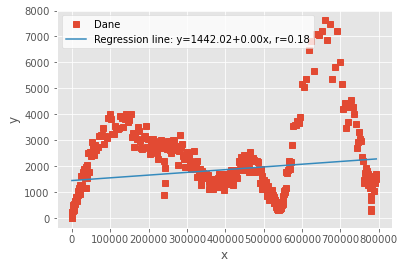

Wykres korelacji dla new_tests i total_tests:
Regression line: y=-211.78+0.02x, r=1.00


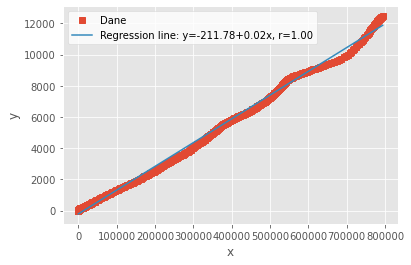

Wykres korelacji dla new_tests i total_tests:
Regression line: y=16.71+0.00x, r=0.38


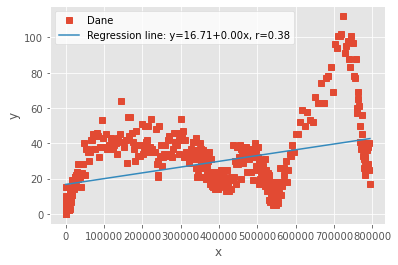

Wykres korelacji dla new_tests i total_tests:
Regression line: y=6840.72+0.02x, r=0.68


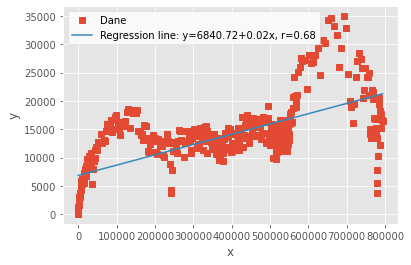

Wykres korelacji dla new_tests i total_tests:
Regression line: y=-296760.06+7.31x, r=0.98


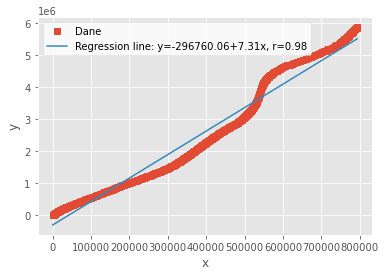

Wykres korelacji dla new_tests i total_tests:
Regression line: y=0.00+1.00x, r=1.00


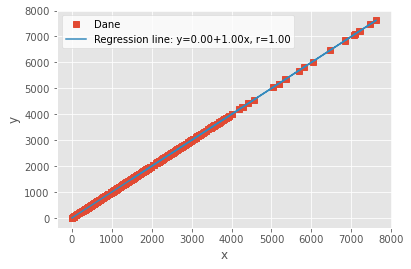

Wykres korelacji dla new_tests i total_tests:
Regression line: y=4726.57+0.35x, r=0.14


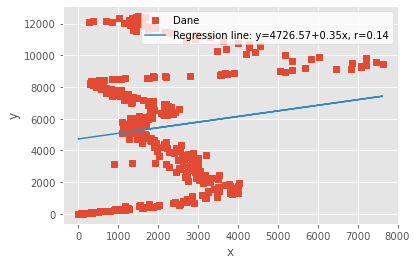

Wykres korelacji dla new_tests i total_tests:
Regression line: y=8.79+0.01x, r=0.76


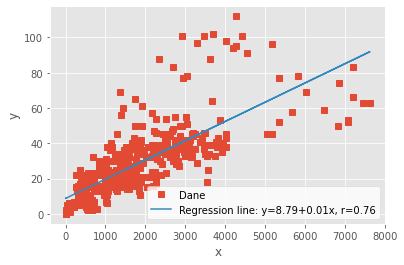

Wykres korelacji dla new_tests i total_tests:
Regression line: y=7375.69+3.35x, r=0.75


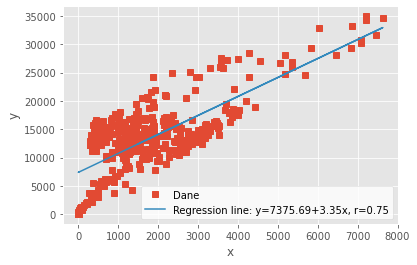

Wykres korelacji dla new_tests i total_tests:
Regression line: y=1977779.63+221.05x, r=0.18


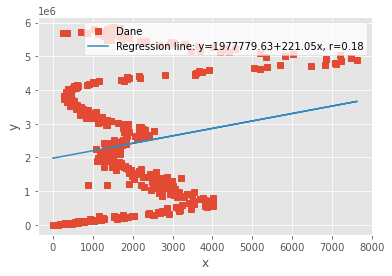

Wykres korelacji dla new_tests i total_tests:
Regression line: y=1541.30+0.05x, r=0.14


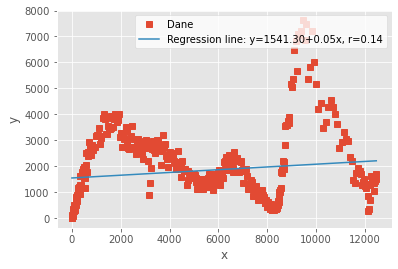

Wykres korelacji dla new_tests i total_tests:
Regression line: y=0.00+1.00x, r=1.00


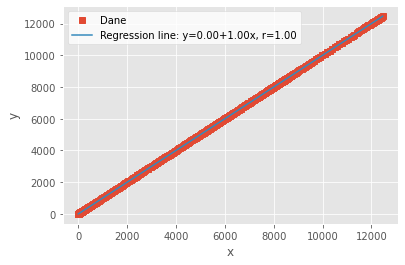

Wykres korelacji dla new_tests i total_tests:
Regression line: y=18.29+0.00x, r=0.35


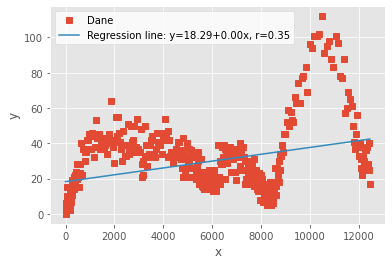

Wykres korelacji dla new_tests i total_tests:
Regression line: y=7327.07+1.15x, r=0.66


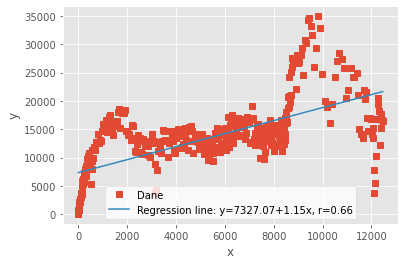

Wykres korelacji dla new_tests i total_tests:
Regression line: y=-204613.49+481.42x, r=0.99


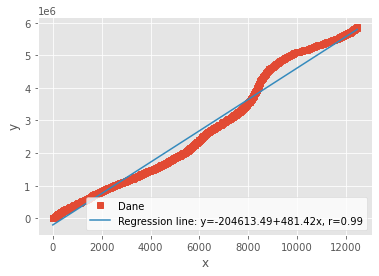

Wykres korelacji dla new_tests i total_tests:
Regression line: y=315.97+52.64x, r=0.76


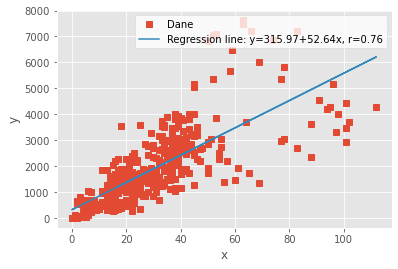

Wykres korelacji dla new_tests i total_tests:
Regression line: y=3587.28+62.18x, r=0.35


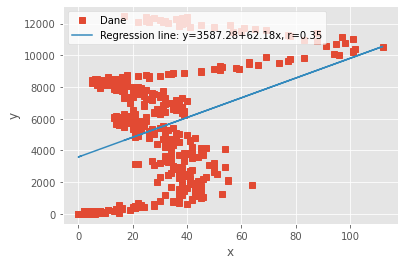

Wykres korelacji dla new_tests i total_tests:
Regression line: y=0.00+1.00x, r=1.00


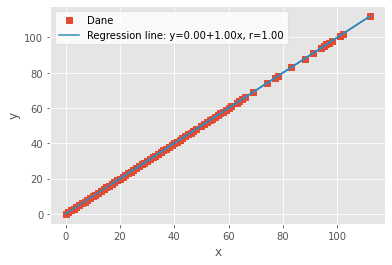

Wykres korelacji dla new_tests i total_tests:
Regression line: y=7650.91+203.91x, r=0.65


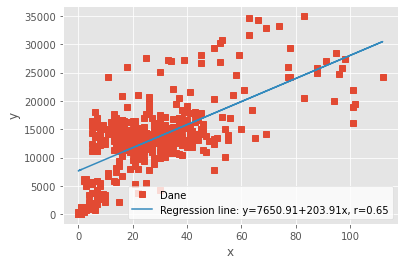

Wykres korelacji dla new_tests i total_tests:
Regression line: y=1472968.54+31657.74x, r=0.36


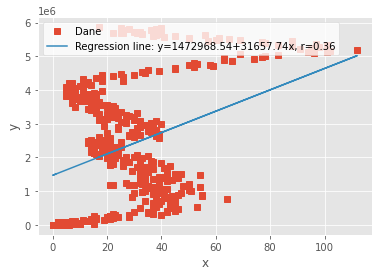

Wykres korelacji dla new_tests i total_tests:
Regression line: y=-412.33+0.17x, r=0.75


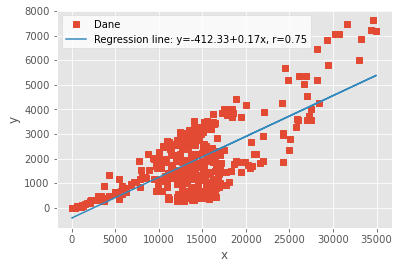

Wykres korelacji dla new_tests i total_tests:
Regression line: y=271.11+0.38x, r=0.66


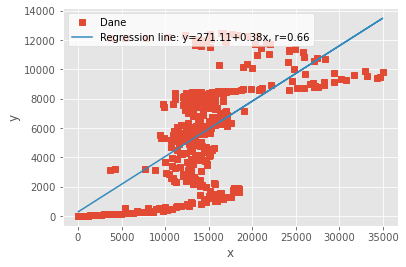

Wykres korelacji dla new_tests i total_tests:
Regression line: y=0.51+0.00x, r=0.65


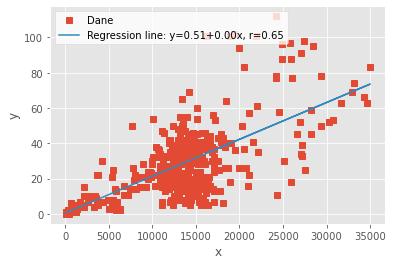

Wykres korelacji dla new_tests i total_tests:
Regression line: y=0.00+1.00x, r=1.00


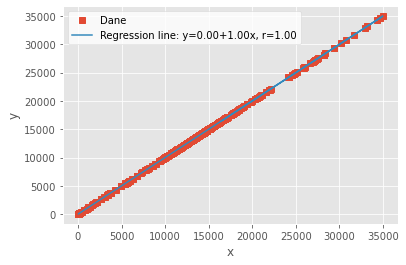

Wykres korelacji dla new_tests i total_tests:
Regression line: y=-183253.27+189.94x, r=0.68


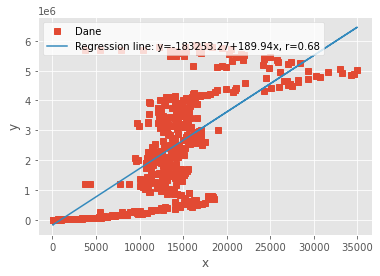

In [64]:
plt.style.use('ggplot')
import scipy.stats
for x in ['total_cases','new_cases','total_deaths','new_deaths','new_tests']:
    for y in ['new_cases','total_deaths','new_deaths','new_tests','total_tests']:
        print("Wykres korelacji dla "+i+" i "+j+":")
        slope, intercept, r, p, stderr = scipy.stats.linregress(dane[x], dane[y])
        linia = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
        print(linia)
        fig, ax = plt.subplots()
        ax.plot(dane[x], dane[y], linewidth=0, marker='s', label='Dane')
        ax.plot(dane[x], intercept + slope * dane[x], label=linia)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend(facecolor='white')
        plt.show()

# T-test:

In [83]:
from scipy.stats import ttest_ind

for i in ['total_cases','new_cases','total_deaths','new_deaths','new_tests']:
    for j in ['new_cases','total_deaths','new_deaths','new_tests','total_tests']:
        if i != j:
            t_test = ttest_ind(dane[i], dane[j])
            print("dla "+i+" i "+j+":", t_test)

dla total_cases i new_cases: Ttest_indResult(statistic=32.11383515051565, pvalue=1.1954361153809405e-149)
dla total_cases i total_deaths: Ttest_indResult(statistic=31.79855739018106, pvalue=1.2227427965601014e-147)
dla total_cases i new_deaths: Ttest_indResult(statistic=32.27272407782771, pvalue=1.1622724002470985e-150)
dla total_cases i new_tests: Ttest_indResult(statistic=31.07531341092901, pvalue=5.0522933553084455e-143)
dla total_cases i total_tests: Ttest_indResult(statistic=-23.67975358909488, pvalue=5.626453877922619e-96)
dla new_cases i total_deaths: Ttest_indResult(statistic=-19.06336658020563, pvalue=6.350110689881385e-68)
dla new_cases i new_deaths: Ttest_indResult(statistic=26.73445269982156, pvalue=2.7832996534784585e-115)
dla new_cases i new_tests: Ttest_indResult(statistic=-37.6827587758563, pvalue=1.0050419700615309e-184)
dla new_cases i total_tests: Ttest_indResult(statistic=-28.21857539952852, pvalue=9.370527972365741e-125)
dla total_deaths i new_cases: Ttest_indResul